In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
ifind_data = pd.read_excel(r'C:\Users\91637\OneDrive\Desktop\Mini Project\fake-news-detection-system-main\fake-news-detection-system-main\Dataset.xlsx')

In [4]:
ifind_data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,True
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,True
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,True


In [5]:
ifind_data['Label'].value_counts()

True    37800
Fake    18914
Name: Label, dtype: int64

In [6]:
ifind_data.rename(columns={'Statement': 'text', 'Label': 'target','Date':'date'}, inplace=True)

In [7]:
ifind_data['target'] = ifind_data['target'].astype(str)
ifind_data['target'].replace(['True','Fake'],[1,0], inplace=True)

In [8]:
ifind_data['target'].value_counts()

1    37800
0    18914
Name: target, dtype: int64

In [9]:
ifind_data.head()

,id,text,Image,Web,Category,date,target
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,1
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,1
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,1


1    37800
0    18914
Name: target, dtype: int64


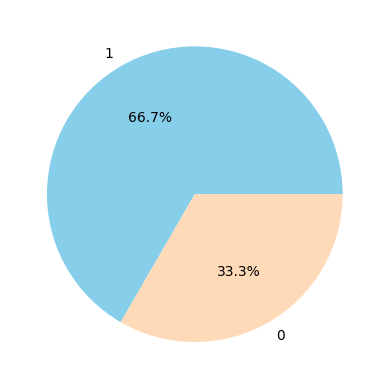

In [10]:
print(ifind_data["target"].value_counts())
g1 = plt.pie(ifind_data["target"].value_counts().values,explode=[0,0],labels=ifind_data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()

GOVERNMENT    10923
VIOLENCE      10578
COVID-19       8710
POLITICS       8670
ELECTION       8396
TERROR         4384
MISLEADING     4059
TRAD            976
MISLEADIND       18
Name: Category, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

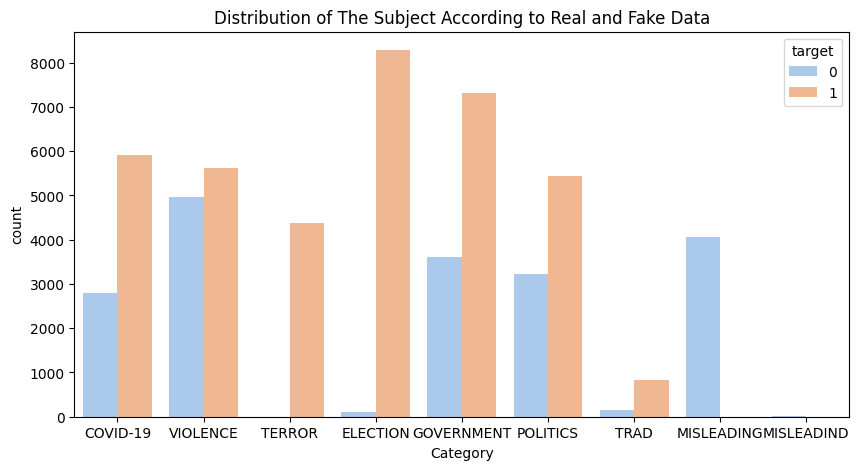

In [11]:
print(ifind_data.Category.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="Category",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

TRIBUNEINDIA        11832
AUGMENT             11321
THEPRINT             8582
THESTATESMAN         7202
THESTATEMAN          4048
INDIANEXPRESS        3983
NEWSMOBILE           2422
INDIATODAY           1698
BOOMLIVE              806
CNN                   778
NEWSMETER             572
ONEINDIA              549
BSMEDIA               449
TEEKHIMIRCHI          387
FACTCRESCENDO         272
AFP                   267
TIMESNOW              238
THELOGICALINDIAN      221
DIGITEYE              175
FACTLY                174
THELOGICALINDIA       173
FACTCHECKER           163
DAPAAN                136
DNAINDIA              121
ALT                    59
WAHSARKAR              42
ENGLISHTRIBUNE         21
INDUSTANTIMES          15
NDTV                    8
Name: Web, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

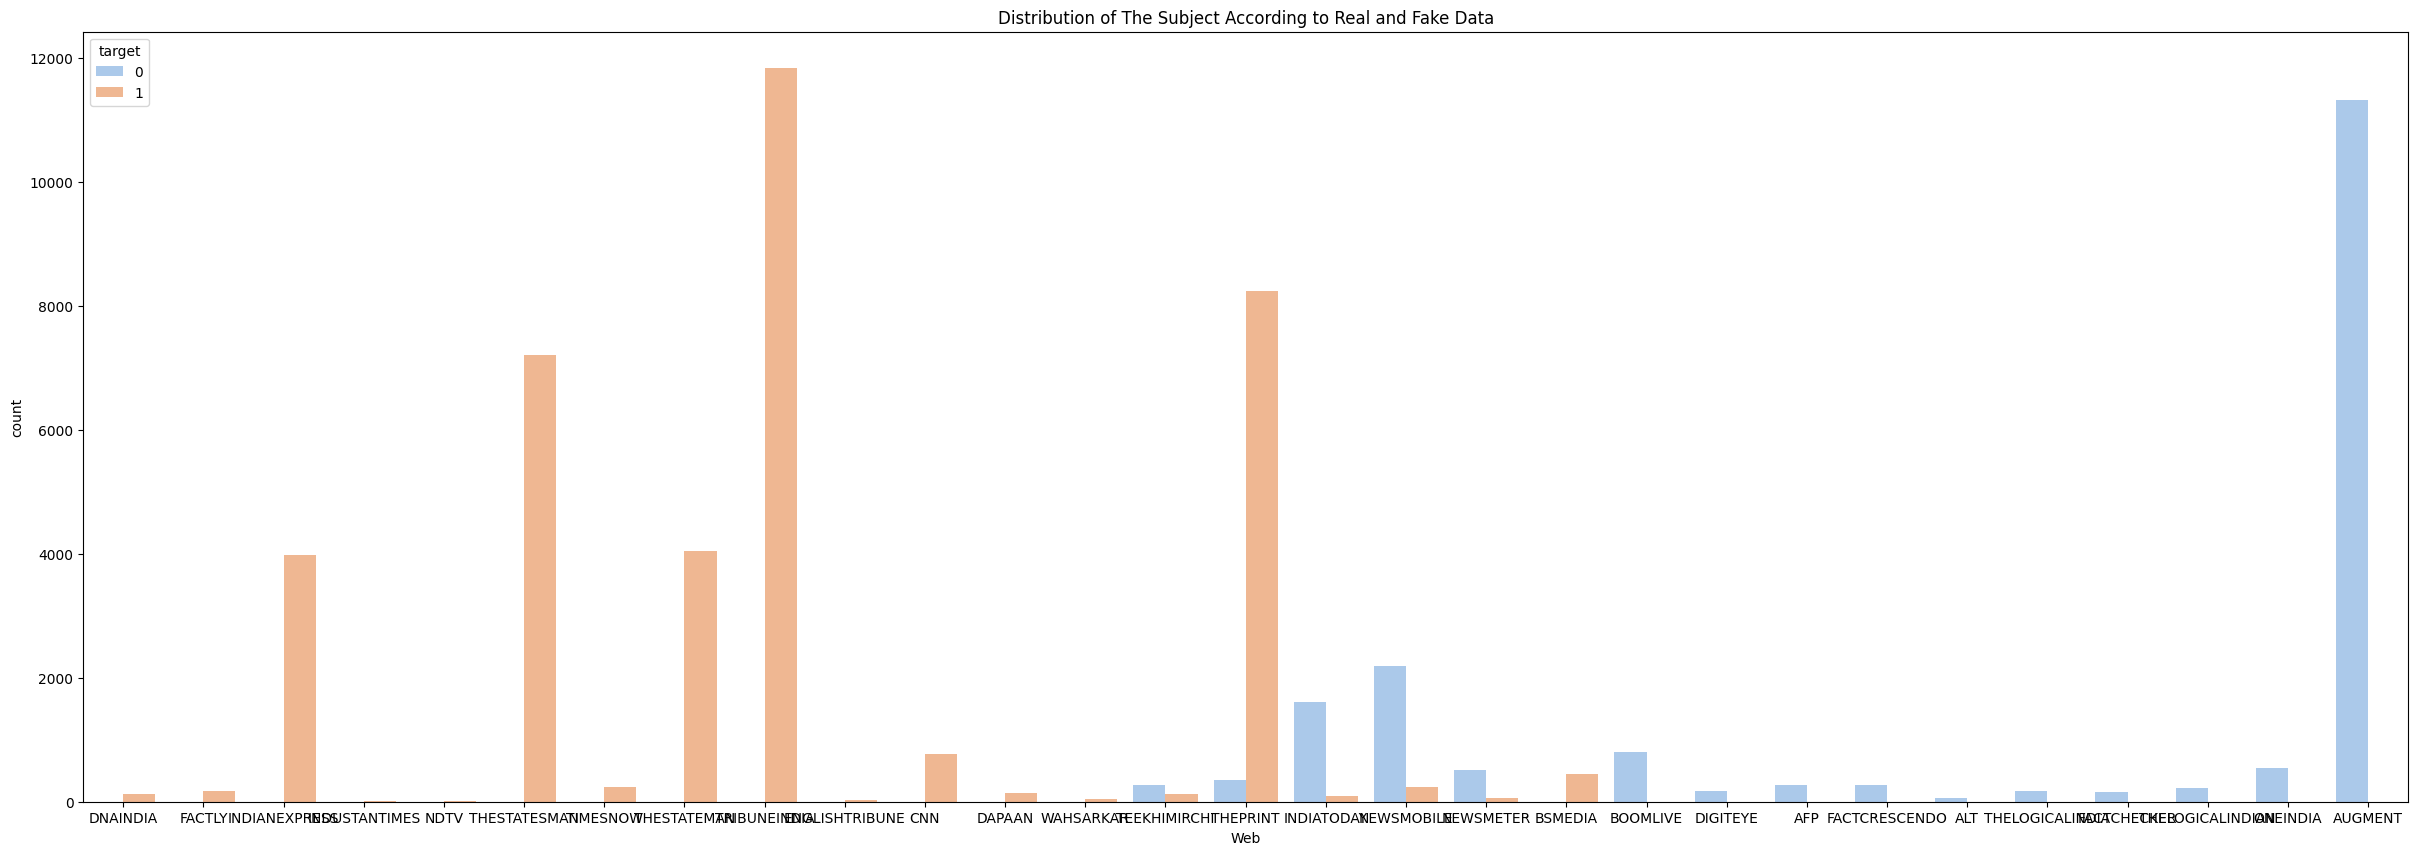

In [12]:
print(ifind_data.Web.value_counts())
plt.figure(figsize=(30, 10))

ax = sns.countplot(x="Web",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [13]:
ifind_data.groupby(['Web','target'])['id'].count()

Web               target
AFP               0           267
ALT               0            59
AUGMENT           0         11321
BOOMLIVE          0           806
BSMEDIA           1           449
CNN               1           778
DAPAAN            1           136
DIGITEYE          0           175
DNAINDIA          1           121
ENGLISHTRIBUNE    1            21
FACTCHECKER       0           163
FACTCRESCENDO     0           272
FACTLY            1           174
INDIANEXPRESS     1          3983
INDIATODAY        0          1606
                  1            92
INDUSTANTIMES     1            15
NDTV              1             8
NEWSMETER         0           506
                  1            66
NEWSMOBILE        0          2190
                  1           232
ONEINDIA          0           549
TEEKHIMIRCHI      0           262
                  1           125
THELOGICALINDIA   0           173
THELOGICALINDIAN  0           221
THEPRINT          0           344
                  1    

In [14]:
data = ifind_data[['text','target']].copy()

In [15]:
data.head()

,text,target
0,"WHO praises India's Aarogya Setu app, says it ...",1
1,"In Delhi, Deputy US Secretary of State Stephen...",1
2,LAC tensions: China's strategy behind delibera...,1
3,India has signed 250 documents on Space cooper...,1
4,Tamil Nadu chief minister's mother passes away...,1


In [16]:
first_text = data.text[10]
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [17]:
#Removal of html content
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [18]:
#removal of punctuation marks and special characters
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'amid stubble burning  delhi s air quality deteriorates to  very poor '

In [19]:
 nltk.download('punkt')
 nltk.download("stopwords") 
 nltk.download('wordnet')
from nltk.corpus import stopwords 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91637\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91637\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91637\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
#tokenization and stopwords
first_text = nltk.word_tokenize(first_text)
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]
first_text

['amid',
 'stubble',
 'burning',
 'delhi',
 'air',
 'quality',
 'deteriorates',
 'poor']

In [21]:
#lemmatization
import nltk
nltk.download('omw-1.4')
first_text = "Amid stubble burning, Delhi's air quality deteriorates to 'very poor "
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text.split()] 
first_text = " ".join(first_text)
first_text

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91637\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


"Amid stubble burning, Delhi's air quality deteriorates to 'very poor"

In [22]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [23]:
#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    #lemma = nltk.WordNetLemmatizer()
    
    final_text = [word for word in text if word not in stopwords.words('english')]
    return " ".join(final_text)

In [24]:
def remove_stopwords(text):
    final_text = []
    final_text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(final_text)

In [25]:
#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [26]:
data['text']=data['text'].apply(remove_html)
data['text']=data['text'].apply(remove_punctuations)
data['text']=data['text'].apply(remove_characters)
data['text']=data['text'].apply(remove_stopwords)

In [27]:
data.head()

,text,target
0,praises India Aarogya Setu app says helped ide...,1
1,Delhi Deputy US Secretary State Stephen Biegun...,1
2,LAC tensions China strategy behind deliberatel...,1
3,India signed documents Space cooperation count...,1
4,Tamil Nadu chief minister mother passes away,1


In [28]:
data.tail()

,text,target
56709,Fact Check Bruce Lee playing ping pong Nunchaku,0
56710,Fact Check Japan construct bridge hours,0
56711,Fact Check Viral video Mexico earthquake years...,0
56712,Fact Check Ballet performance Chinese couple g...,0
56713,Fact Check little boy crossing Jordan alone lo...,0


In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

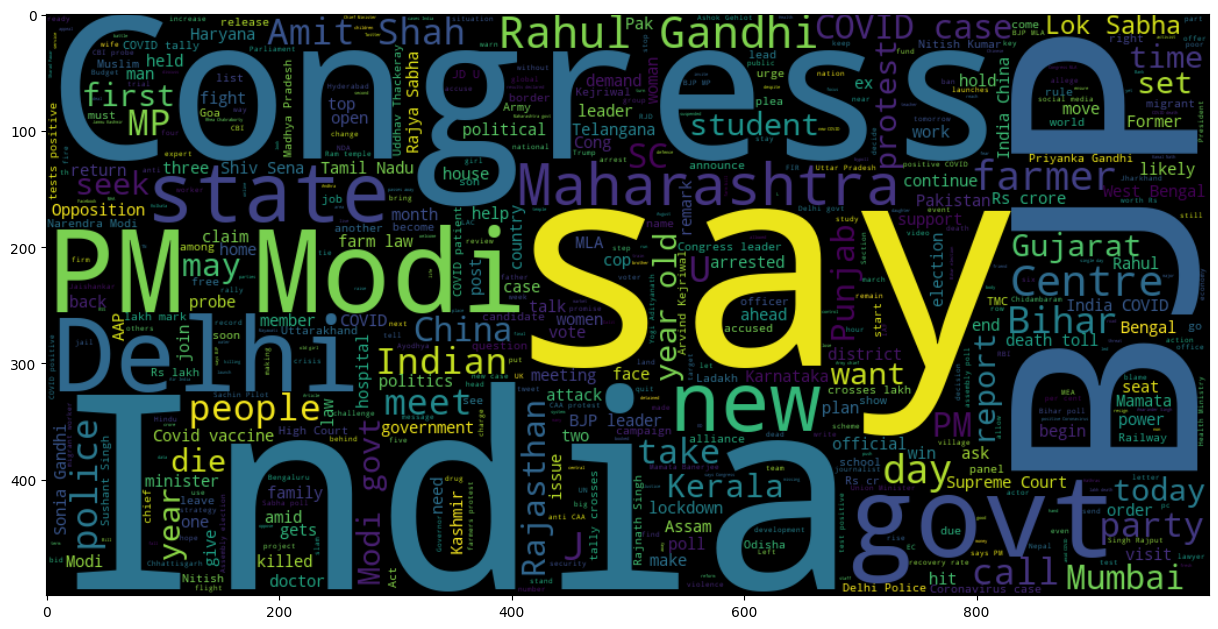

In [30]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

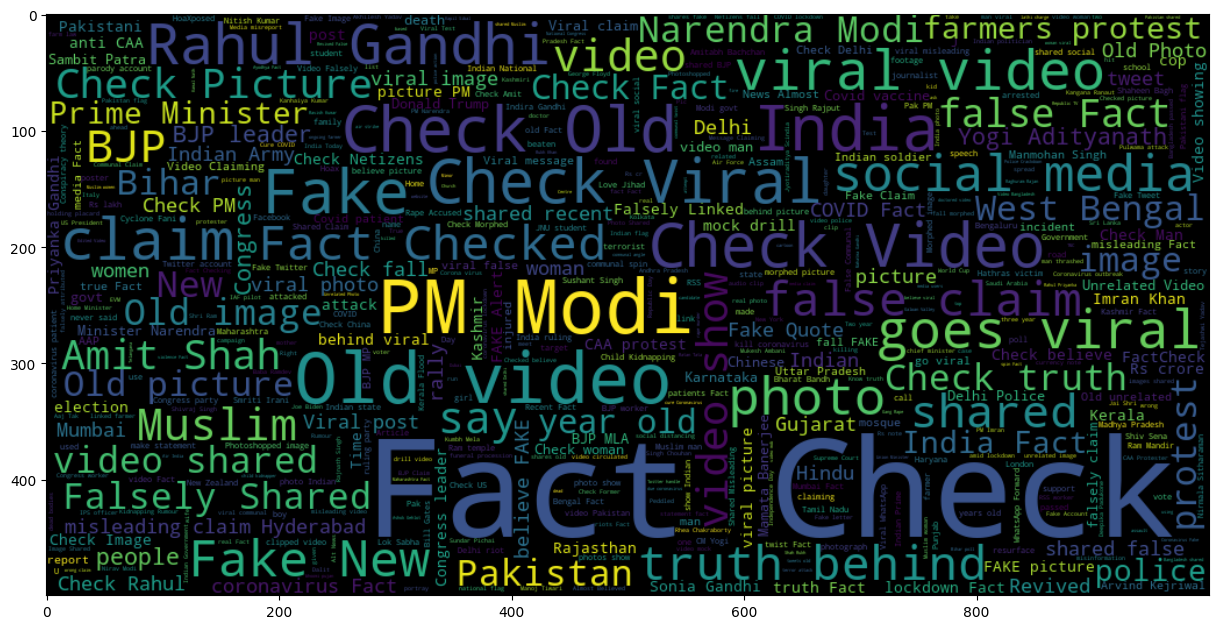

In [31]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

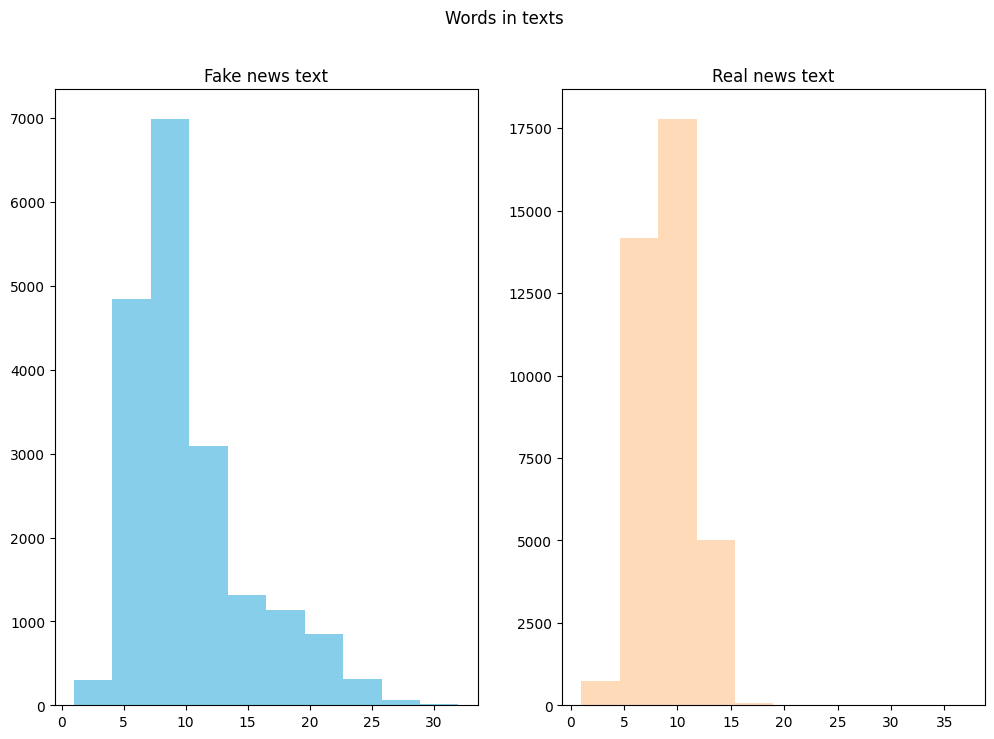

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [33]:
texts = ' '.join(data['text'])

In [34]:
string = texts.split(" ")

In [35]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

       word  count
0   (Fact,)   9958
1  (Check,)   9045
2  (India,)   5122
3    (BJP,)   4680
4   (Modi,)   4518


<AxesSubplot: xlabel='count', ylabel='word'>

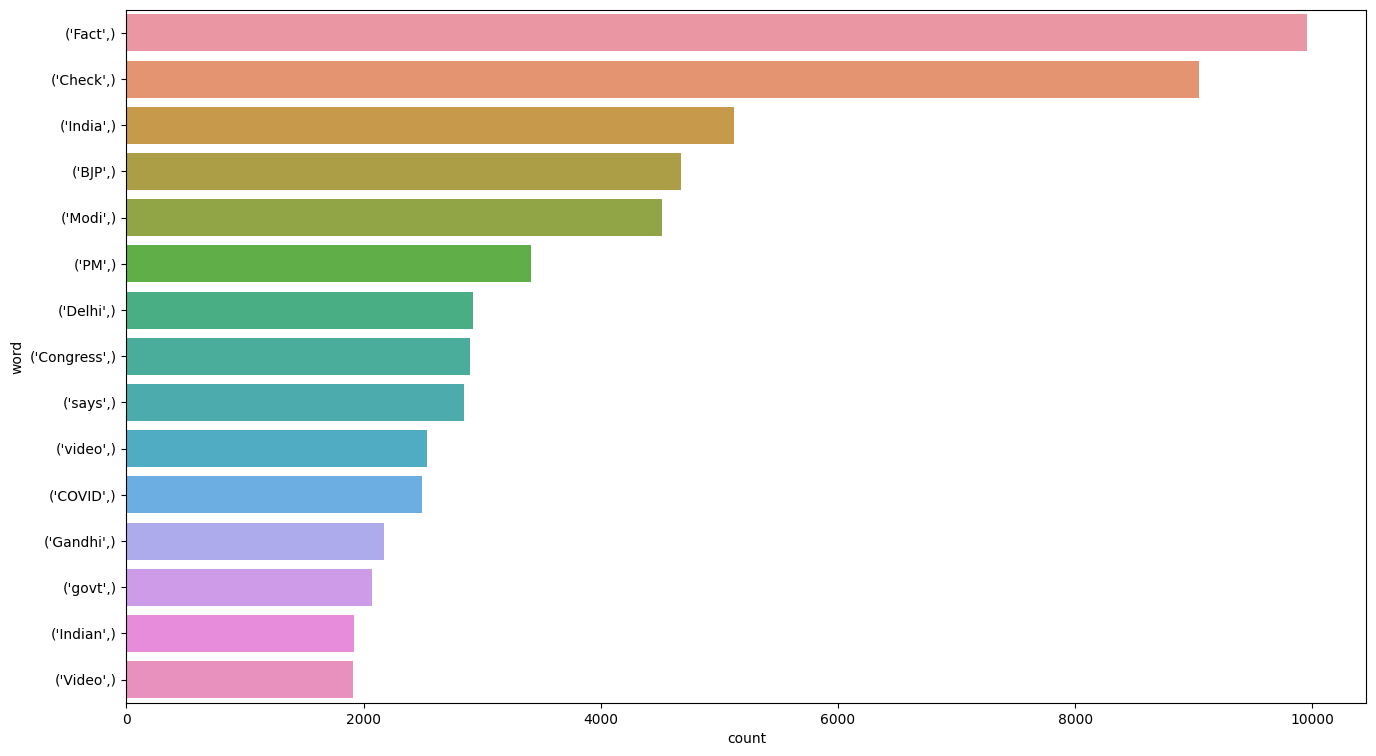

In [36]:
draw_n_gram(string,1)

              word  count
0    (Fact, Check)   9011
1       (PM, Modi)   2328
2  (Rahul, Gandhi)   1228
3     (Amit, Shah)    739
4           (J, K)    711


<AxesSubplot: xlabel='count', ylabel='word'>

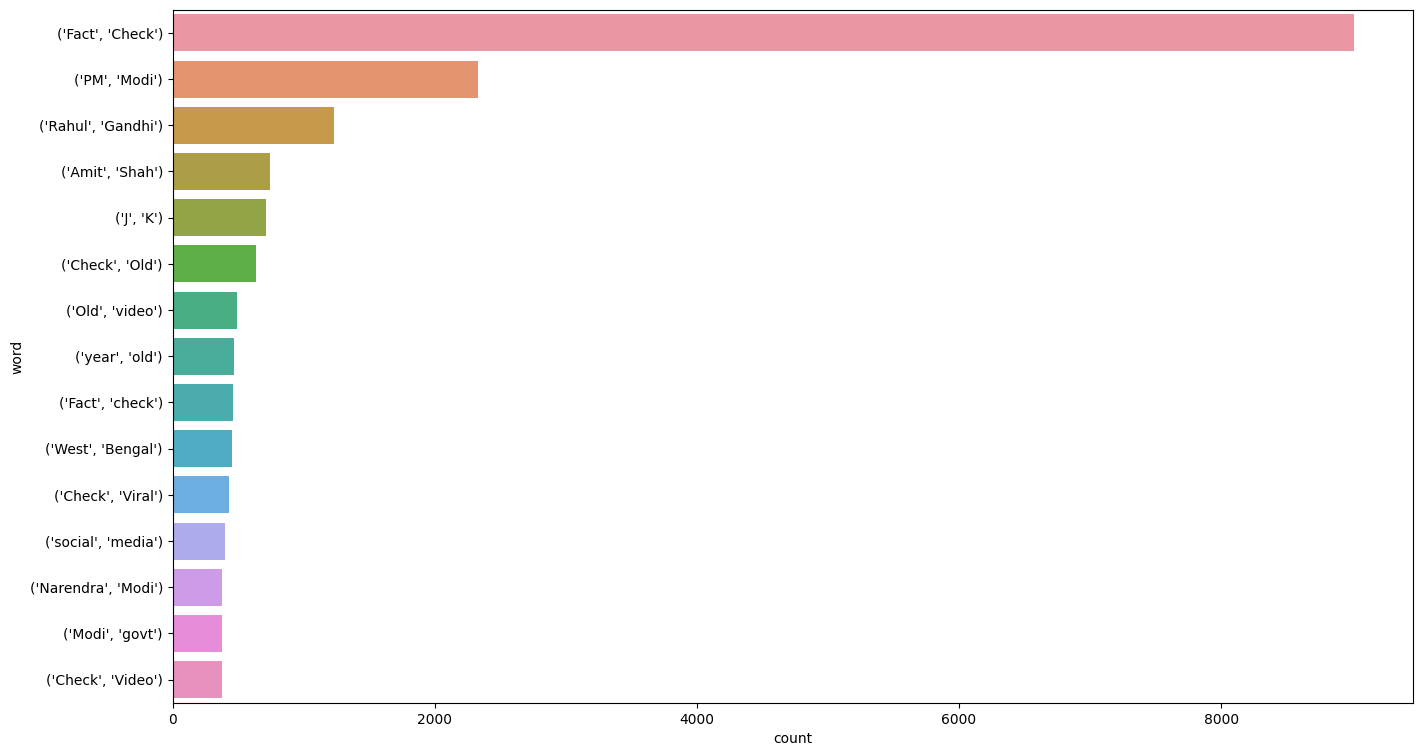

In [37]:
draw_n_gram(string,2)

                       word  count
0        (Fact, Check, Old)    638
1      (Fact, Check, Viral)    429
2      (Fact, Check, Video)    373
3  (Sushant, Singh, Rajput)    189
4      (Fact, Check, video)    176


<AxesSubplot: xlabel='count', ylabel='word'>

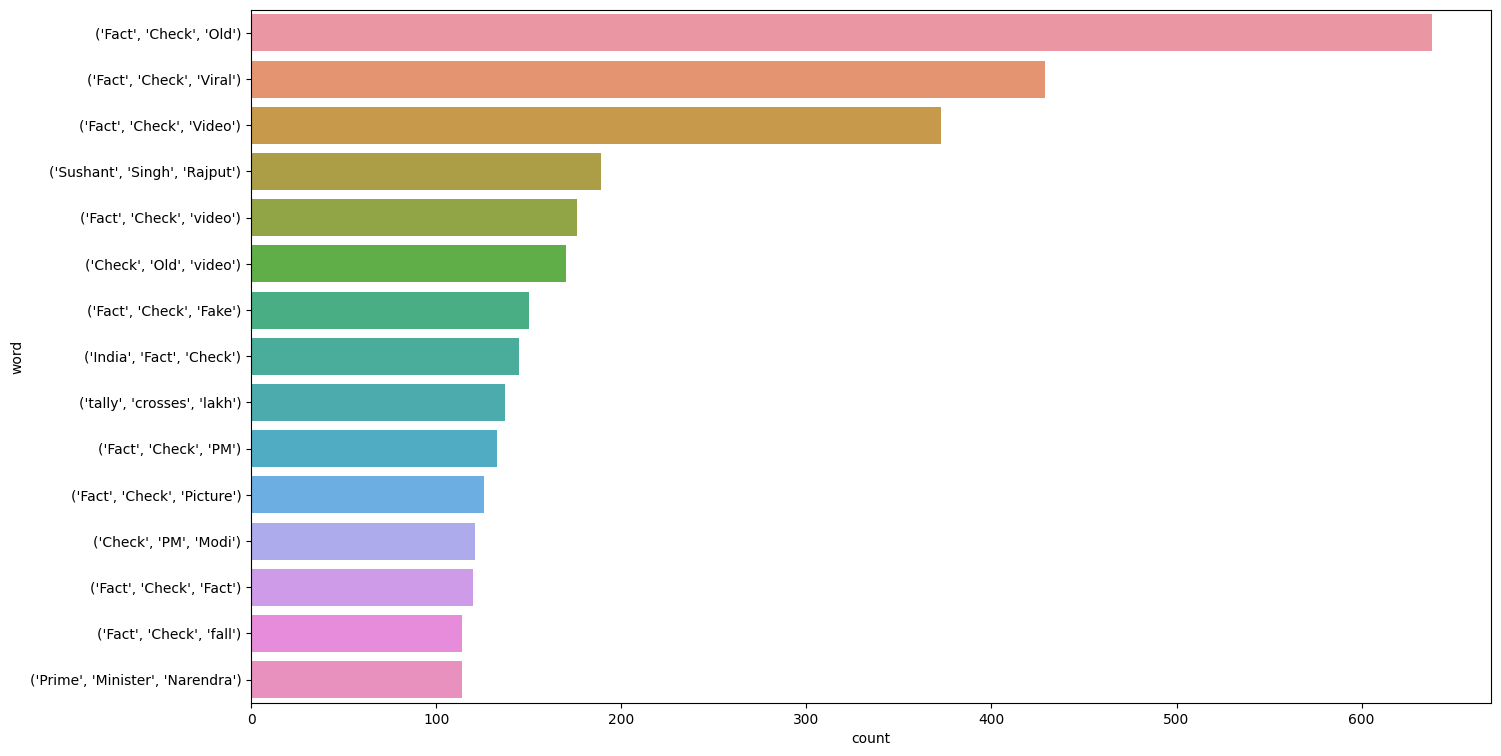

In [38]:
draw_n_gram(string,3)

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
X = data['text']
y = data['target']
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()





In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [42]:
print('\n the total number of training data :',y_train.shape)


 the total number of training data : (39699,)


In [43]:
print('\n the total number of testing data :',y_test.shape)


 the total number of testing data : (17015,)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [45]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)
# Classification metrics
classification_report = classification_report(y_test, y_pred)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9342344989714957


In [46]:
# Training the classifier & predicting on test data
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
# Classification metrics

print('\n Accuracy: ', accuracy_score(y_test, y_pred))



 Accuracy:  0.9286511901263591


In [47]:
classifier_rf = RandomForestClassifier(n_estimators=10)
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9301792535997649


In [48]:
!pip install textblob 

DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [49]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
from datetime import datetime

In [50]:
def timesofindia():
    url = "https://timesofindia.indiatimes.com/home/headlines"
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data,"html.parser")
    times_of_india_news = []
    counter = 0
    for divtag in soup.find_all('div', {'class': 'headlines-list'}):
        for ultag in divtag.find_all('ul', {'class': 'clearfix'}):
            if (counter <= 10):
                for litag in ultag.find_all('li'):
                    counter = counter + 1
                    print(str(counter),datetime.today().strftime('%Y-%m-%d') + "." + litag.text + " - https://timesofindia.indiatimes.com" + litag.find('a')['href'])
                    times_of_india_news.append(['Times of India',datetime.today().strftime('%Y-%m-%d'),litag.text])
    return times_of_india_news

In [51]:
times_of_india_news = timesofindia()

1 2024-03-21.Modi has achieved what leaders like Trump, Erdogan could not18 Mar 2024, 1426 hrs IST - https://timesofindia.indiatimes.com/india/what-modi-has-figured-out-that-trump-never-has/articleshow/108583953.cms
2 2024-03-21.Techies with these skills may get more than 50% salary hike: Report - https://timesofindia.indiatimes.com/technology/tech-news/techies-with-these-skills-may-get-more-than-50-salary-hike-claims-report/articleshow/108657314.cms
3 2024-03-21.'Arre bhai, insaan hai': Rohit swats away Ashwin's critics - https://timesofindia.indiatimes.com/sports/cricket/news/arre-bhai-insaan-hai-rohit-sharma-swats-away-ravichandran-ashwins-critics/articleshow/108671426.cms
4 2024-03-21.'Part of India': US opposes China's claim over Arunachal - https://timesofindia.indiatimes.com/india/arunachal-pradesh-part-of-india-us-amid-rising-india-china-tensions/articleshow/108662795.cms
5 2024-03-21.Doctor, crew, flyers team up to save life of passenger mid-air - https://timesofindia.indiatim

In [52]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [53]:
pip install --upgrade setuptools

   ---------------------------------------- 0.0/821.5 kB ? eta -:--:--
   -- ------------------------------------- 61.4/821.5 kB 3.4 MB/s eta 0:00:01
   ----- ---------------------------------- 122.9/821.5 kB 1.8 MB/s eta 0:00:01
   ---------- ----------------------------- 225.3/821.5 kB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 286.7/821.5 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 368.6/821.5 kB 1.8 MB/s eta 0:00:01
   ----------------------- ---------------- 491.5/821.5 kB 1.8 MB/s eta 0:00:01
   ------------------------- -------------- 532.5/821.5 kB 1.7 MB/s eta 0:00:01
   --------------------------------- ------ 696.3/821.5 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  819.2/821.5 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 821.5/821.5 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.1.1
    Uninstalling setuptools-69.1.1:
      Su

DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [54]:
pip install feedparser

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [55]:
pip install "beautifulsoup4==4.9.1"

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [56]:
pip install "dateparser==0.7.6"

DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [57]:
pip install "requests==2.24.0"

DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [58]:
pip install "feedparser==6.0.8"

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [59]:
pip install --no-deps pygooglenews

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\eth_brownie-1.19.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\py-1.11.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\91637\appdata\local\programs\python\python311\lib\site-packages\pycryptodome-3.15.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c

In [60]:
from pygooglenews import GoogleNews
import json
import time



def fetching_google_news():
    gn = GoogleNews()
    top = gn.top_news()

    entries = top["entries"]
    count = 0
    google_news = []
    for entry in entries:
        count = count + 1
        print( str(count) + ". " + entry["title"] + entry["published"])
        google_news.append(['Google News',entry["published"],entry["title"] ])
        time.sleep(1)
    return google_news

In [61]:
google_news = fetching_google_news()

1. AOC takes heat over 'RICO is not a crime' comment in Biden impeachment probe hearing - Fox NewsThu, 21 Mar 2024 02:00:10 GMT
2. Mississippi 'Goon Squad' case highlights abuse in rural areas and power of sheriffs - PBS NewsHourThu, 21 Mar 2024 01:04:34 GMT
3. Georgia executes death row inmate Willie Pye for the 1993 murder of Alicia Lynn Yarbrough - CNNThu, 21 Mar 2024 04:18:29 GMT
4. Letitia James doubts Trump is ‘truly unable’ to come up with $454M bond as deadline to pay up inches closer - New York PostWed, 20 Mar 2024 23:03:45 GMT
5. Texas immigration ruling puts spotlight on nation's most conservative federal appeals court - The Associated PressWed, 20 Mar 2024 21:32:00 GMT
6. Angela Chao Was Intoxicated When She Died in Car Wreck, Police Report Shows - The New York TimesThu, 21 Mar 2024 00:00:50 GMT
7. Judge allows Trump to appeal Fani Willis ruling - BBC.comWed, 20 Mar 2024 23:30:25 GMT
8. California voters approve Newsom's mental health ballot measure - POLITICO - POLITICOThu

In [62]:
news_content = []

In [63]:
news_content+=times_of_india_news
news_content+= google_news
news_content_df = pd.DataFrame(news_content,columns = ['New_Site','Date' , 'Title'])

In [64]:
news_content_df.head()

,New_Site,Date,Title
0,Times of India,2024-03-21,"Modi has achieved what leaders like Trump, Erd..."
1,Times of India,2024-03-21,Techies with these skills may get more than 50...
2,Times of India,2024-03-21,"'Arre bhai, insaan hai': Rohit swats away Ashw..."
3,Times of India,2024-03-21,'Part of India': US opposes China's claim over...
4,Times of India,2024-03-21,"Doctor, crew, flyers team up to save life of p..."


In [65]:
textblob_sentiment=[]
for index , row in news_content_df.iterrows():
    title = row['Title']
    txt= TextBlob(title)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([a,b])

In [66]:
news_content_df['Text_blob_Polarity'] , news_content_df['Text_blob_Subjectivity'] = zip(*textblob_sentiment)

In [67]:
news_content_df['Title_clean']=news_content_df['Title'].apply(remove_html)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_punctuations)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_characters)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_stopwords)

In [68]:
X_real = td.transform(news_content_df['Title_clean']).toarray()

In [69]:
news_content_df['Prediction_LR'] = classifier_lr.predict(X_real)
news_content_df['Prediction_RF'] = classifier_rf.predict(X_real)
news_content_df['Prediction_NB'] = classifier_nb.predict(X_real)

In [70]:
news_content_df['Prediction_LR'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_RF'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_NB'].replace([1,0], ['True','Fake'],inplace=True)

In [71]:
news_content_df.head()

,New_Site,Date,Title,Text_blob_Polarity,Text_blob_Subjectivity,Title_clean,Prediction_LR,Prediction_RF,Prediction_NB
0,Times of India,2024-03-21,"Modi has achieved what leaders like Trump, Erd...",0.0,0.0,Modi achieved leaders like Trump Erdogan could...,True,True,True
1,Times of India,2024-03-21,Techies with these skills may get more than 50...,0.5,0.5,Techies skills may get salary hike Report,True,True,True
2,Times of India,2024-03-21,"'Arre bhai, insaan hai': Rohit swats away Ashw...",0.0,0.0,Arre bhai insaan hai Rohit swats away Ashwin c...,True,Fake,Fake
3,Times of India,2024-03-21,'Part of India': US opposes China's claim over...,0.0,0.0,Part India US opposes China claim Arunachal,True,Fake,True
4,Times of India,2024-03-21,"Doctor, crew, flyers team up to save life of p...",0.0,0.0,Doctor crew flyers team save life passenger mi...,True,True,True


In [72]:
news_content_df.to_excel('Result.xlsx')

In [73]:
def real_time_prediction(news):
  news_transformed = td.transform([news]).toarray()
  Prediction_LR = classifier_lr.predict(news_transformed)
  Prediction_RF = classifier_rf.predict(news_transformed)
  Prediction_NB = classifier_nb.predict(news_transformed)
  Prediction_LR = ['Real'  if i == 1 else 'Fake' for i in Prediction_LR ]
  print(f"Based on Logistic Regression model this News is ::{Prediction_LR[0]}")
  Prediction_RF = ['Real'  if i == 1 else 'Fake' for i in Prediction_RF ]
  print(f"Based on  Random Forest Model this News is ::{Prediction_RF[0]}")
  Prediction_NB = ['Real'  if i == 1 else 'Fake' for i in Prediction_NB ]
  print(f"Based on Naive Bayes model this News is :: {Prediction_NB[0]} ")

In [74]:
news = input("Please Enter the News which you want to predict : ")
real_time_prediction(news)